import pandas

In [3]:
import pandas as pd 

Accepts my link as something useful

In [4]:
 from urllib.request import urlopen 

Store the link with the csv in a var

In [5]:
data_url = "https://gist.githubusercontent.com/dinosaursninja/cae83a39276ecf50d5c137e3a849fb09/raw/f091c3ac8b71914b79acc8064f935b61ab8eb0cf/Cost%2520of%2520Cancer%2520Treatments%25202010%2520to%25202020"

Store url in an object

In [6]:
data = urlopen(data_url) 

Upload that data as a dataframe and store in variable called df


In [7]:
df = pd.read_csv(data) 

Show the data type for each column in the data set 

In [8]:
df.dtypes

Cancer Site                                                   object
Year                                                           int64
Sex                                                           object
Age                                                           object
Incidence and Survival Assumptions                            object
Annual Cost Increase (applied to initial and last phases)     object
Total Costs                                                  float64
Initial Year After Diagnosis Cost                            float64
Continuing Phase Cost                                        float64
Last Year of Life Cost                                       float64
dtype: object

Show the header of the dataset

In [9]:
df.head() 

,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
0,AllSites,2010,Both sexes,All ages,Incidence/Survival at constant rate,0%,124565.6,40463.5,46642.8,37459.2
1,AllSites,2010,Both sexes,All ages,Incidence follows recent trend/Survival constant,0%,122420.8,38552.7,46671.9,37196.3
2,AllSites,2010,Both sexes,All ages,Survival follows recent trend/Incidence constant,0%,125397.7,40463.5,47136.3,37797.9
3,AllSites,2010,Both sexes,All ages,Incidence/Survival follow recent trends,0%,123236.3,38552.7,47155.7,37527.8
4,AllSites,2010,Both sexes,All ages,Incidence/Survival follow recent trends,2%,123236.3,38552.7,47155.7,37527.8


Summarize

In [10]:
df.describe() 

,Year,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,2015.000000,15221.008852,4677.505742,5764.655024,4778.848804
std,3.163539,31489.503603,9703.258460,12094.699099,9930.281985
min,2010.000000,1204.600000,293.000000,98.900000,330.600000
25%,2012.000000,2866.625000,939.175000,846.875000,908.925000
50%,2015.000000,5107.350000,1377.150000,1940.350000,1755.200000
75%,2018.000000,14178.925000,4883.050000,5187.200000,4465.275000
max,2020.000000,206587.100000,68858.000000,66099.700000,74159.700000


### Explain your dataset and what you would like to do with it.
Long term, I would like to group the cancer by types and see how the cost of treatment compares amongst the groups.

Short term for this assignment I would like to compare the standard deviation for the three columns (initial cost, contuinuing cost and last year of life) to see hoe the phases compare from one phase to another in terms of cost.

### Add a new Column : 
The column added is the standard deviation (std)
for intial cost, continuing phase cost and final year of life cost.


STD tells us the variability, or spread, of a distribution. 
How spread out the data is. It is a measure of how far each observed value is from the mean.


In [11]:
#print("The standard deviation for column 'Continuing Phase Cost' is: ")
print("The standard deviation for the column 'Continuing Phase Cost' is: ", df['Continuing Phase Cost'].std())


The standard deviation for the column 'Continuing Phase Cost' is:  12094.699098688146


In [12]:
print(df.columns)

Index(['Cancer Site', 'Year', 'Sex', 'Age',
       'Incidence and Survival Assumptions',
       'Annual Cost Increase (applied to initial and last phases)',
       'Total Costs', 'Initial Year After Diagnosis Cost',
       'Continuing Phase Cost', 'Last Year of Life Cost'],
      dtype='object')


iloc: Isolates the target columns by indexing by number instead of letters. The axis = 1, specifies that it is the columns not rows that you are extracting/isolating.

In [13]:
df.iloc[:,[-3,-2,-1]].std(axis=1) 

0       4682.379665
1       5124.259702
2       4810.360308
3       5287.697789
4       5287.697789
           ...     
1249    4892.094920
1250    6864.061310
1251    6493.607914
1252    5955.006260
1253    5047.996289
Length: 1254, dtype: float64

Store the values you have isolated into the specified column. In this case the Column is being defined simultanously. 


In [14]:
df['Standard Deviation for all Initial, Continuing, and Last year'] = df.iloc[:,[-3,-2,-1]].std(axis=1) 

In [15]:
df.describe()

,Year,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost,"Standard Deviation for all Initial, Continuing, and Last year"
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,2015.000000,15221.008852,4677.505742,5764.655024,4778.848804,1369.796157
std,3.163539,31489.503603,9703.258460,12094.699099,9930.281985,1655.607430
min,2010.000000,1204.600000,293.000000,98.900000,330.600000,132.721111
25%,2012.000000,2866.625000,939.175000,846.875000,908.925000,355.310762
50%,2015.000000,5107.350000,1377.150000,1940.350000,1755.200000,731.501188
75%,2018.000000,14178.925000,4883.050000,5187.200000,4465.275000,1565.791520
max,2020.000000,206587.100000,68858.000000,66099.700000,74159.700000,10904.125117


In [16]:
df.head()


,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost,"Standard Deviation for all Initial, Continuing, and Last year"
0,AllSites,2010,Both sexes,All ages,Incidence/Survival at constant rate,0%,124565.6,40463.5,46642.8,37459.2,4682.379665
1,AllSites,2010,Both sexes,All ages,Incidence follows recent trend/Survival constant,0%,122420.8,38552.7,46671.9,37196.3,5124.259702
2,AllSites,2010,Both sexes,All ages,Survival follows recent trend/Incidence constant,0%,125397.7,40463.5,47136.3,37797.9,4810.360308
3,AllSites,2010,Both sexes,All ages,Incidence/Survival follow recent trends,0%,123236.3,38552.7,47155.7,37527.8,5287.697789
4,AllSites,2010,Both sexes,All ages,Incidence/Survival follow recent trends,2%,123236.3,38552.7,47155.7,37527.8,5287.697789


#### Run a filtering operation by using Dataframe row indexing using a comparison statement that yields a boolean array/matrix.

Returns true for treatments that cost more during initial phase than the last year of life && creates a new column for that data.


In [17]:
df['Initial Cost Exceeds Last Year of Life'] = df['Initial Year After Diagnosis Cost'] > df['Last Year of Life Cost']

In [18]:
df.head()

,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost,"Standard Deviation for all Initial, Continuing, and Last year",Initial Cost Exceeds Last Year of Life
0,AllSites,2010,Both sexes,All ages,Incidence/Survival at constant rate,0%,124565.6,40463.5,46642.8,37459.2,4682.379665,True
1,AllSites,2010,Both sexes,All ages,Incidence follows recent trend/Survival constant,0%,122420.8,38552.7,46671.9,37196.3,5124.259702,True
2,AllSites,2010,Both sexes,All ages,Survival follows recent trend/Incidence constant,0%,125397.7,40463.5,47136.3,37797.9,4810.360308,True
3,AllSites,2010,Both sexes,All ages,Incidence/Survival follow recent trends,0%,123236.3,38552.7,47155.7,37527.8,5287.697789,True
4,AllSites,2010,Both sexes,All ages,Incidence/Survival follow recent trends,2%,123236.3,38552.7,47155.7,37527.8,5287.697789,True


#### Change the index of your dataset using the set_index method to one of your columns and display the resulting table: 

Change the index of your dataset using the set_index method to one of your columns and display the resulting table.


In [19]:
df.set_index('Cancer Site', inplace=True)

In [20]:
df.head()

,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost,"Standard Deviation for all Initial, Continuing, and Last year",Initial Cost Exceeds Last Year of Life
Cancer Site,,,,,,,,,,,
AllSites,2010,Both sexes,All ages,Incidence/Survival at constant rate,0%,124565.6,40463.5,46642.8,37459.2,4682.379665,True
AllSites,2010,Both sexes,All ages,Incidence follows recent trend/Survival constant,0%,122420.8,38552.7,46671.9,37196.3,5124.259702,True
AllSites,2010,Both sexes,All ages,Survival follows recent trend/Incidence constant,0%,125397.7,40463.5,47136.3,37797.9,4810.360308,True
AllSites,2010,Both sexes,All ages,Incidence/Survival follow recent trends,0%,123236.3,38552.7,47155.7,37527.8,5287.697789,True
AllSites,2010,Both sexes,All ages,Incidence/Survival follow recent trends,2%,123236.3,38552.7,47155.7,37527.8,5287.697789,True


#### Select a subset of rows from your dataset, and save it in a separate file as CSV or another format (see Ch 6)

In [21]:
#Subset of rows ~ come back to this

#### Count the missing values in your dataset and indicate how many in rows and columns indicate how many in rows and columns:
 DataFrame.isnull() detects missing values returns True or False.
 DataFrame.sum() returns the sum of the values for the requested axis.
 

In [22]:
print("Missing values are: \n\n ", df.isnull())

Missing values are: 

                Year    Sex    Age  Incidence and Survival Assumptions  \
Cancer Site                                                            
AllSites     False  False  False                               False   
AllSites     False  False  False                               False   
AllSites     False  False  False                               False   
AllSites     False  False  False                               False   
AllSites     False  False  False                               False   
...            ...    ...    ...                                 ...   
Other        False  False  False                               False   
Other        False  False  False                               False   
Other        False  False  False                               False   
Other        False  False  False                               False   
Other        False  False  False                               False   

             Annual Cost Increase (appl

In [23]:
print("Count of the total of the missing values are for each of the columns: \n \n ", df.isnull().sum())

Count of the total of the missing values are for each of the columns: 
 
  Year                                                             0
Sex                                                              0
Age                                                              0
Incidence and Survival Assumptions                               0
Annual Cost Increase (applied to initial and last phases)        0
Total Costs                                                      0
Initial Year After Diagnosis Cost                                0
Continuing Phase Cost                                            0
Last Year of Life Cost                                           0
Standard Deviation for all Initial, Continuing, and Last year    0
Initial Cost Exceeds Last Year of Life                           0
dtype: int64


In [24]:
for i in range(len(df.index)):

    print("Count of the total of the missing values are for each of the rows: \n \n ", i + 1, ":" , df.iloc[i].isnull().sum())

Count of the total of the missing values are for each of the rows: 
 
  1 : 0
Count of the total of the missing values are for each of the rows: 
 
  2 : 0
Count of the total of the missing values are for each of the rows: 
 
  3 : 0
Count of the total of the missing values are for each of the rows: 
 
  4 : 0
Count of the total of the missing values are for each of the rows: 
 
  5 : 0
Count of the total of the missing values are for each of the rows: 
 
  6 : 0
Count of the total of the missing values are for each of the rows: 
 
  7 : 0
Count of the total of the missing values are for each of the rows: 
 
  8 : 0
Count of the total of the missing values are for each of the rows: 
 
  9 : 0
Count of the total of the missing values are for each of the rows: 
 
  10 : 0
Count of the total of the missing values are for each of the rows: 
 
  11 : 0
Count of the total of the missing values are for each of the rows: 
 
  12 : 0
Count of the total of the missing values are for each of the 

Count of the total of the missing values are for each of the rows: 
 
  151 : 0
Count of the total of the missing values are for each of the rows: 
 
  152 : 0
Count of the total of the missing values are for each of the rows: 
 
  153 : 0
Count of the total of the missing values are for each of the rows: 
 
  154 : 0
Count of the total of the missing values are for each of the rows: 
 
  155 : 0
Count of the total of the missing values are for each of the rows: 
 
  156 : 0
Count of the total of the missing values are for each of the rows: 
 
  157 : 0
Count of the total of the missing values are for each of the rows: 
 
  158 : 0
Count of the total of the missing values are for each of the rows: 
 
  159 : 0
Count of the total of the missing values are for each of the rows: 
 
  160 : 0
Count of the total of the missing values are for each of the rows: 
 
  161 : 0
Count of the total of the missing values are for each of the rows: 
 
  162 : 0
Count of the total of the missing values

  332 : 0
Count of the total of the missing values are for each of the rows: 
 
  333 : 0
Count of the total of the missing values are for each of the rows: 
 
  334 : 0
Count of the total of the missing values are for each of the rows: 
 
  335 : 0
Count of the total of the missing values are for each of the rows: 
 
  336 : 0
Count of the total of the missing values are for each of the rows: 
 
  337 : 0
Count of the total of the missing values are for each of the rows: 
 
  338 : 0
Count of the total of the missing values are for each of the rows: 
 
  339 : 0
Count of the total of the missing values are for each of the rows: 
 
  340 : 0
Count of the total of the missing values are for each of the rows: 
 
  341 : 0
Count of the total of the missing values are for each of the rows: 
 
  342 : 0
Count of the total of the missing values are for each of the rows: 
 
  343 : 0
Count of the total of the missing values are for each of the rows: 
 
  344 : 0
Count of the total of the miss

  511 : 0
Count of the total of the missing values are for each of the rows: 
 
  512 : 0
Count of the total of the missing values are for each of the rows: 
 
  513 : 0
Count of the total of the missing values are for each of the rows: 
 
  514 : 0
Count of the total of the missing values are for each of the rows: 
 
  515 : 0
Count of the total of the missing values are for each of the rows: 
 
  516 : 0
Count of the total of the missing values are for each of the rows: 
 
  517 : 0
Count of the total of the missing values are for each of the rows: 
 
  518 : 0
Count of the total of the missing values are for each of the rows: 
 
  519 : 0
Count of the total of the missing values are for each of the rows: 
 
  520 : 0
Count of the total of the missing values are for each of the rows: 
 
  521 : 0
Count of the total of the missing values are for each of the rows: 
 
  522 : 0
Count of the total of the missing values are for each of the rows: 
 
  523 : 0
Count of the total of the miss

  706 : 0
Count of the total of the missing values are for each of the rows: 
 
  707 : 0
Count of the total of the missing values are for each of the rows: 
 
  708 : 0
Count of the total of the missing values are for each of the rows: 
 
  709 : 0
Count of the total of the missing values are for each of the rows: 
 
  710 : 0
Count of the total of the missing values are for each of the rows: 
 
  711 : 0
Count of the total of the missing values are for each of the rows: 
 
  712 : 0
Count of the total of the missing values are for each of the rows: 
 
  713 : 0
Count of the total of the missing values are for each of the rows: 
 
  714 : 0
Count of the total of the missing values are for each of the rows: 
 
  715 : 0
Count of the total of the missing values are for each of the rows: 
 
  716 : 0
Count of the total of the missing values are for each of the rows: 
 
  717 : 0
Count of the total of the missing values are for each of the rows: 
 
  718 : 0
Count of the total of the miss

  853 : 0
Count of the total of the missing values are for each of the rows: 
 
  854 : 0
Count of the total of the missing values are for each of the rows: 
 
  855 : 0
Count of the total of the missing values are for each of the rows: 
 
  856 : 0
Count of the total of the missing values are for each of the rows: 
 
  857 : 0
Count of the total of the missing values are for each of the rows: 
 
  858 : 0
Count of the total of the missing values are for each of the rows: 
 
  859 : 0
Count of the total of the missing values are for each of the rows: 
 
  860 : 0
Count of the total of the missing values are for each of the rows: 
 
  861 : 0
Count of the total of the missing values are for each of the rows: 
 
  862 : 0
Count of the total of the missing values are for each of the rows: 
 
  863 : 0
Count of the total of the missing values are for each of the rows: 
 
  864 : 0
Count of the total of the missing values are for each of the rows: 
 
  865 : 0
Count of the total of the miss

  1046 : 0
Count of the total of the missing values are for each of the rows: 
 
  1047 : 0
Count of the total of the missing values are for each of the rows: 
 
  1048 : 0
Count of the total of the missing values are for each of the rows: 
 
  1049 : 0
Count of the total of the missing values are for each of the rows: 
 
  1050 : 0
Count of the total of the missing values are for each of the rows: 
 
  1051 : 0
Count of the total of the missing values are for each of the rows: 
 
  1052 : 0
Count of the total of the missing values are for each of the rows: 
 
  1053 : 0
Count of the total of the missing values are for each of the rows: 
 
  1054 : 0
Count of the total of the missing values are for each of the rows: 
 
  1055 : 0
Count of the total of the missing values are for each of the rows: 
 
  1056 : 0
Count of the total of the missing values are for each of the rows: 
 
  1057 : 0
Count of the total of the missing values are for each of the rows: 
 
  1058 : 0
Count of the tota

  1162 : 0
Count of the total of the missing values are for each of the rows: 
 
  1163 : 0
Count of the total of the missing values are for each of the rows: 
 
  1164 : 0
Count of the total of the missing values are for each of the rows: 
 
  1165 : 0
Count of the total of the missing values are for each of the rows: 
 
  1166 : 0
Count of the total of the missing values are for each of the rows: 
 
  1167 : 0
Count of the total of the missing values are for each of the rows: 
 
  1168 : 0
Count of the total of the missing values are for each of the rows: 
 
  1169 : 0
Count of the total of the missing values are for each of the rows: 
 
  1170 : 0
Count of the total of the missing values are for each of the rows: 
 
  1171 : 0
Count of the total of the missing values are for each of the rows: 
 
  1172 : 0
Count of the total of the missing values are for each of the rows: 
 
  1173 : 0
Count of the total of the missing values are for each of the rows: 
 
  1174 : 0
Count of the tota

#### Remove rows or columns of missing values from your dataset:
DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)


In [25]:
print("removes NaN values from columns: "), df.dropna(axis ='columns', thresh=2)
print("removes NaN values from rows: "), df.dropna(thresh=2)

removes NaN values from columns: 
removes NaN values from rows: 


(None,
              Year         Sex       Age  \
 Cancer Site                               
 AllSites     2010  Both sexes  All ages   
 AllSites     2010  Both sexes  All ages   
 AllSites     2010  Both sexes  All ages   
 AllSites     2010  Both sexes  All ages   
 AllSites     2010  Both sexes  All ages   
 ...           ...         ...       ...   
 Other        2020  Both sexes  All ages   
 Other        2020  Both sexes  All ages   
 Other        2020  Both sexes  All ages   
 Other        2020  Both sexes  All ages   
 Other        2020  Both sexes  All ages   
 
                            Incidence and Survival Assumptions  \
 Cancer Site                                                     
 AllSites                  Incidence/Survival at constant rate   
 AllSites     Incidence follows recent trend/Survival constant   
 AllSites     Survival follows recent trend/Incidence constant   
 AllSites              Incidence/Survival follow recent trends   
 AllSites              

#### Replace missing values in one column or row with a specified value ~ This does not work for my dataset since it does not contain misssing values and I would like to maintain the integrity of the data.

## Make the following graphs, but make sure they have proper axis labels and titles:

1. Select three numerical columns and display their distributions by bar plotting. You can either use the hist() method in matplotlib or the output of the value_counts() method in pandas

In [26]:
df.head()

,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost,"Standard Deviation for all Initial, Continuing, and Last year",Initial Cost Exceeds Last Year of Life
Cancer Site,,,,,,,,,,,
AllSites,2010,Both sexes,All ages,Incidence/Survival at constant rate,0%,124565.6,40463.5,46642.8,37459.2,4682.379665,True
AllSites,2010,Both sexes,All ages,Incidence follows recent trend/Survival constant,0%,122420.8,38552.7,46671.9,37196.3,5124.259702,True
AllSites,2010,Both sexes,All ages,Survival follows recent trend/Incidence constant,0%,125397.7,40463.5,47136.3,37797.9,4810.360308,True
AllSites,2010,Both sexes,All ages,Incidence/Survival follow recent trends,0%,123236.3,38552.7,47155.7,37527.8,5287.697789,True
AllSites,2010,Both sexes,All ages,Incidence/Survival follow recent trends,2%,123236.3,38552.7,47155.7,37527.8,5287.697789,True


Text(0, 0.5, 'Search Frequency')

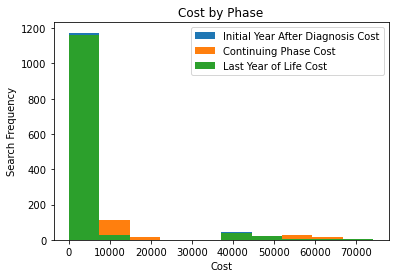

In [27]:
import matplotlib.pyplot as plt
slice = df[['Initial Year After Diagnosis Cost', 'Continuing Phase Cost','Last Year of Life Cost']]

#The number of rows that match a certain price by stage of treatment.
graph = slice.plot.hist()
graph.set_title('Cost by Phase')
graph.set_xlabel('Cost')
graph.set_ylabel('Search Frequency')




2. Arrange the previous set of plots into vertically-aligned subplots of one figure.


Text(0.5, 0.98, 'Vertically aligned subplots of Treatment Cost')

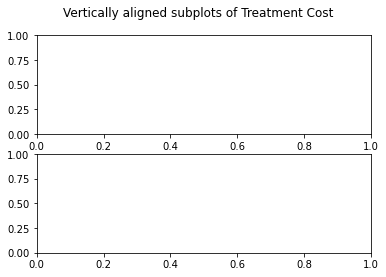

In [28]:
# come back to this

import matplotlib.pyplot as plt

slice1 = df[['Initial Year After Diagnosis Cost']]
slice2 = df[['Continuing Phase Cost']]
slice3 = df[['Last Year of Life Cost']]

# graph = slice.add_subplot()
# graph.set_title('Cost by Phase')

fig, slice1 = plt.subplots(2)

fig.suptitle('Vertically aligned subplots of Treatment Cost')
#fig.set_xlabel('Cost')
#fig.set_ylabel('Search Frequency')

3. Select two numerical columns and plot a line graph showing the relationship between them. (use markers or make a scatter plot)

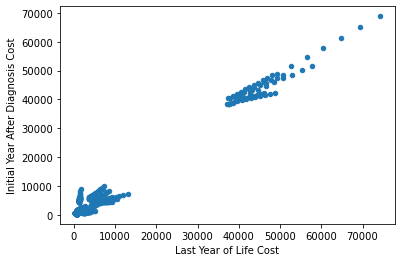

In [29]:
slice = df[['Initial Year After Diagnosis Cost', 'Last Year of Life Cost']]
graph = slice.plot.scatter(x = 'Last Year of Life Cost', y= 'Initial Year After Diagnosis Cost')


4. Select more than two numerical columns and plot a multi-line graph with different markers/colors comparing them (see matplotlib.pylot.plot for list of markers). Use different row subsets if you don't have enough columns to compare. Show a legend. Add a text annotation.



The data is grouped by index, 'Cancer Site' (this is both an index and a column),so that the three numerical columns being compared (initial, continuous and final cost) are organized in terms of cancer location. 


We then take the average cost for each group, using the mean()function.This is so that the avergae price for each group is what is being evaluated.
We are sorting in acending order according to the total cost.
A friend suggested it would be a great idea that the data be sorted in descending order based on the total cost of the procedure. I used this idea and organized it in terms of ascending order by total cost.


We rotate the x axis by 45, and adjust the size of the graph using sizefig, so that the labels/graphs won't overlap. Similarly, the function plt.xticks(size, labels)  makes all of the labels on the x axis readable (on trial 1 it would condense it so not all of them showed.)


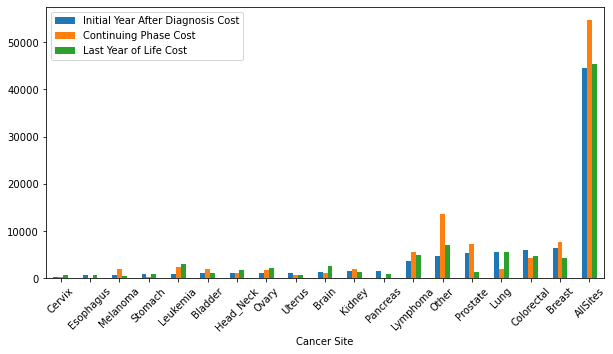

In [30]:
import numpy as np

####Trial 2
phaseCostGraph = df.groupby('Cancer Site').mean()[['Initial Year After Diagnosis Cost','Continuing Phase Cost','Last Year of Life Cost']].sort_values('Initial Year After Diagnosis Cost', ascending=True)

#adjust how data is displayed
phaseCostGraph.plot.bar(rot=45, figsize=(10, 5))
plt.xticks(np.arange(len(phaseCostGraph.index)), phaseCostGraph.index)
plt.show()


##### Trial 1
#slice = df[['Initial Year After Diagnosis Cost','Continuing Phase Cost','Last Year of Life Cost']]
# graph = df['Initial Year After Diagnosis Cost'].plot(
#     kind='line',
#     marker='*',
#     legend=True,
#     figsize=(10,5),
#     label='Initial Year After Diagnosis Cost')
# df['Continuing Phase Cost'].plot(
#     kind='line',
#     ax=graph,
#     marker='h',
#     legend=True,
#     label='Continuing Phase Cost')
# df['Last Year of Life Cost'].plot(
#     kind='line',
#     ax=graph,
#     marker='o',
#     legend=True,
#     label='Last Year of Life Cost')

# graph.set_title('Cost by Stage')
# graph

5. Select a categorical (text) column and another numerical column, set the dataframe index to the categorical column and display a bar plot of the numerical column where the x-axis labels show the categories.

My index has already been set to a categorical column in earlier stages of this project. As it stands, the index is the column 'Cancer Site'.

In [ ]:
import numpy as np

graph = df[['Total Costs']]
                   
#adjust how data is displayed
graph.plot.bar(rot=45, figsize=(10, 5))
plt.xticks(np.arange(len(graph.index)), graph.index)
plt.show()


6. Save one of your figures as a png file.

In [32]:
Im driving myself insanse running in a loop. 
Does it make sense to do that or Im I jumping the gun
I need to get a good night sleep


~merge branches and sort through changes
~ Get deliverables and manual done today (R)
~ comment source code and turn it in (R)
~take exam (R)
~show up to class 

SyntaxError: invalid syntax (<ipython-input-32-905f70ddfca1>, line 1)